In [5]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import ast
import numpy as np

In [13]:
questions = pd.read_csv('data/Binary/CombinedBinaryDataWithCategories.csv')
questions

,QuestionText,Answer,Year,Categories
0,Will advanced LIGO announce discovery of gravi...,no,2016,"['Technology', 'Stock Market']"
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[]
2,Will we confirm evidence for megastructures or...,no,2016,"['Technology', 'Political', 'Sports', 'Health ..."
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[]
4,The FAA to soon open the door to commercial us...,no,2016,"['Technology', 'Stock Market']"
...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,['Health and Epidemiology']
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"['Health and Epidemiology', 'Stock Market']"
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"['Health and Epidemiology', 'Stock Market']"
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"['Health and Epidemiology', 'Stock Market']"


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
def get_value(text):
    if 'yes' in text.lower():
        return 1
    elif 'no' in text.lower():
        return 0
    else:
        return None

In [8]:
def makeCM(combined):
    y_true = []
    y_pred = []
    noneCount = 0
    for i in range(len(combined['Predictions'])):
        temp1 = get_value(combined['Predictions'][i])
        if temp1 is None:
            noneCount += 1
            continue
        y_pred.append(temp1)
        y_true.append(get_value(combined['Answer'][i]))
    return y_pred, y_true, noneCount

In [9]:
allYears = list(questions['Year'].unique())
allYears

[2016, 2019, 2017, 2015, 2018, 2022, 2020, 2021, 2023]

In [10]:
allCategories = [
    'Technology',
    'Political',
    'Sports',
    'Health and Epidemiology',
    'Stock Market',
    'Supply Chain'
]

### WizardLM

In [12]:
data1 = pd.read_csv('data/Binary/testSave0-1999.csv')
data2 = pd.read_csv('data/Binary/testSave2000-2900.csv')
data3 = pd.read_csv('data/Binary/testSave2900-2999.csv')
data3 = data3.iloc[1:, :]
data4 = pd.read_csv('data/Binary/testSave3000-3300.csv')
data5 = pd.read_csv('data/Binary/testSave3300-3699.csv')
data5 = data5.iloc[1:, :]
data6 = pd.read_csv('data/Binary/testSave3700-4000.csv')
data7 = pd.read_csv('data/Binary/testSave4000-4300.csv')
data7 = data7.iloc[1:,:]
data8 = pd.read_csv('data/Binary/testSave4300-4462.csv')
data8 = data8.iloc[1:,:]

In [14]:
finalPredictions = []
finalPredictions.extend(list(data1['predictions']))
finalPredictions.extend(list(data2['predictions']))
finalPredictions.extend(list(data3['predictions']))
finalPredictions.extend(list(data4['predictions']))
finalPredictions.extend(list(data5['predictions']))
finalPredictions.extend(list(data6['predictions']))
finalPredictions.extend(list(data7['predictions']))
finalPredictions.extend(list(data8['predictions']))

# Using WLM in varibale namings coz the model's name is WizardLM
WLMPredictions = finalPredictions
WLMTotal = questions.copy(deep=True)
WLMTotal['Predictions'] = WLMPredictions
WLMTotal

,QuestionText,Answer,Year,Categories,Predictions
0,Will advanced LIGO announce discovery of gravi...,no,2016,"['Technology', 'Stock Market']",NO
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],YES
2,Will we confirm evidence for megastructures or...,no,2016,"['Technology', 'Political', 'Sports', 'Health ...",NO
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],NO
4,The FAA to soon open the door to commercial us...,no,2016,"['Technology', 'Stock Market']",YES
...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,['Health and Epidemiology'],YES
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES


### Total Predictions

In [15]:
yPredWLMTotal, yTrueWLMTotal, noneCountWLMTotal = makeCM(WLMTotal)
print(f'Total None predictions: {noneCountWLMTotal}')
confusion_matrix(yTrueWLMTotal, yPredWLMTotal)

Total None predictions: 0


array([[2517,  424],
       [1159,  363]], dtype=int64)

### Years

In [16]:
WLMyearsData = {}
for year in allYears:
    yearData = WLMTotal[WLMTotal['Year']==year]
    yearData = yearData.reset_index()
    WLMyearsData[year] = makeCM(yearData)

correct = []
incorrect = []
for year in WLMyearsData:
    cm = confusion_matrix(WLMyearsData[year][1], WLMyearsData[year][0])
    correct.append((cm[0][0]+cm[1][1]))
    incorrect.append(np.sum(cm)-correct[-1])

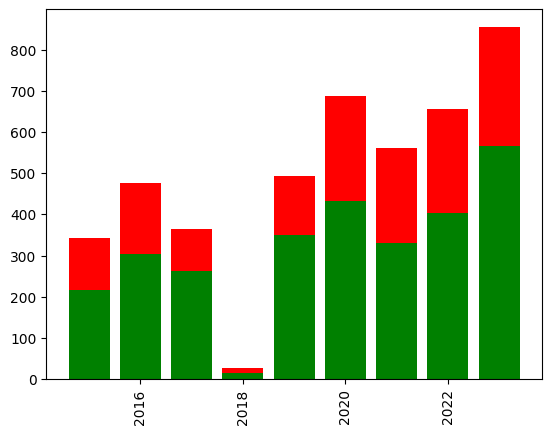

In [17]:
import matplotlib.pyplot as plt

x = sorted(WLMyearsData)

y1 = correct
y2 = incorrect

plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.xticks(rotation=90)
plt.show()

### Categories

In [18]:
present = {cat:[] for cat in allCategories}

for i in range(len(WLMTotal['Categories'])):
    WLMTotal['Categories'][i] = ast.literal_eval(WLMTotal['Categories'][i])
    for cat in present:
        if cat in WLMTotal['Categories'][i]:
            present[cat].append(True)
        else:
            present[cat].append(False)

for cat in present:
    WLMTotal[cat] = present[cat]
WLMTotal

C:\Users\vetur\AppData\Local\Temp\ipykernel_16308\3857081748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WLMTotal['Categories'][i] = ast.literal_eval(WLMTotal['Categories'][i])


,QuestionText,Answer,Year,Categories,Predictions,Technology,Political,Sports,Health and Epidemiology,Stock Market,Supply Chain
0,Will advanced LIGO announce discovery of gravi...,no,2016,"[Technology, Stock Market]",NO,True,False,False,False,True,False
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],YES,False,False,False,False,False,False
2,Will we confirm evidence for megastructures or...,no,2016,"[Technology, Political, Sports, Health and Epi...",NO,True,True,True,True,True,True
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],NO,False,False,False,False,False,False
4,The FAA to soon open the door to commercial us...,no,2016,"[Technology, Stock Market]",YES,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,[Health and Epidemiology],YES,False,False,False,True,False,False
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"[Health and Epidemiology, Stock Market]",YES,False,False,False,True,True,False
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"[Health and Epidemiology, Stock Market]",YES,False,False,False,True,True,False
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"[Health and Epidemiology, Stock Market]",YES,False,False,False,True,True,False


In [19]:
WLMcategoriesData = {}
for category in allCategories:
    categoryData = WLMTotal[WLMTotal[category]]
    categoryData = categoryData.reset_index()
    WLMcategoriesData[category] = makeCM(categoryData)

correct_cat = []
incorrect_cat = []
for category in sorted(WLMcategoriesData):
    cm = confusion_matrix(WLMcategoriesData[category][1], WLMcategoriesData[category][0])
    correct_cat.append((cm[0][0]+cm[1][1])/np.sum(cm))
    incorrect_cat.append(1-correct_cat[-1])

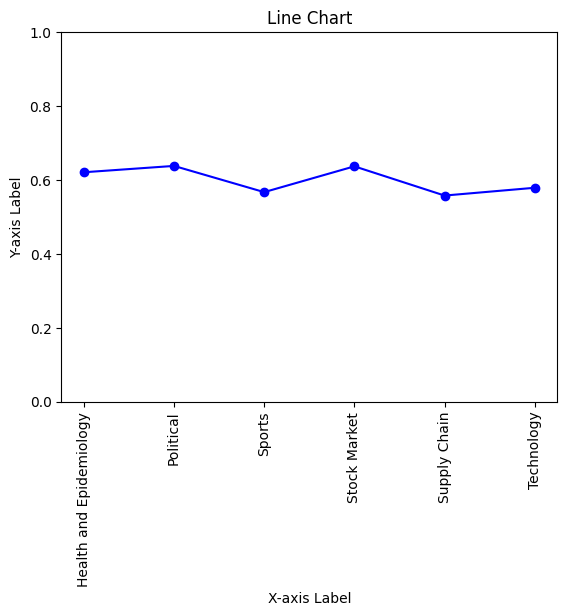

In [20]:
import matplotlib.pyplot as plt

x = sorted(WLMcategoriesData)
y1 = correct_cat

plt.plot(x, y1, color='b', marker='o')  # 'o' adds markers to data points
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel('X-axis Label')  # Add a label for the X-axis
plt.ylabel('Y-axis Label')  # Add a label for the Y-axis
plt.title('Line Chart')  # Add a title for the chart
plt.show()


### Hermes

In [21]:
hermesData = pd.read_csv('data/Binary/hermesPredictions0-4462.csv')
hermesPredictions = hermesData['predictions']
hermesTotal = questions.copy(deep=True)
hermesTotal['Predictions'] = hermesPredictions
hermesTotal

,QuestionText,Answer,Year,Categories,Predictions
0,Will advanced LIGO announce discovery of gravi...,no,2016,"['Technology', 'Stock Market']",YES
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],YES
2,Will we confirm evidence for megastructures or...,no,2016,"['Technology', 'Political', 'Sports', 'Health ...",YES.
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],YES
4,The FAA to soon open the door to commercial us...,no,2016,"['Technology', 'Stock Market']",YES.
...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,['Health and Epidemiology'],YES.
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES.
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES.
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"['Health and Epidemiology', 'Stock Market']",YES.


In [22]:
yPredhermesTotal, yTruehermesTotal, noneCounthermesTotal = makeCM(hermesTotal)
print(f'Total None predictions: {noneCounthermesTotal}')
confusion_matrix(yTruehermesTotal, yPredhermesTotal)

Total None predictions: 0


array([[ 107, 2834],
       [  60, 1462]], dtype=int64)

In [23]:
hermesyearsData = {}
for year in allYears:
    yearData = hermesTotal[hermesTotal['Year']==year]
    yearData = yearData.reset_index()
    hermesyearsData[year] = makeCM(yearData)

hermes_correct = []
hermes_incorrect = []
for year in hermesyearsData:
    cm = confusion_matrix(hermesyearsData[year][1], hermesyearsData[year][0])
    hermes_correct.append((cm[0][0]+cm[1][1]))
    hermes_incorrect.append(np.sum(cm)-hermes_correct[-1])


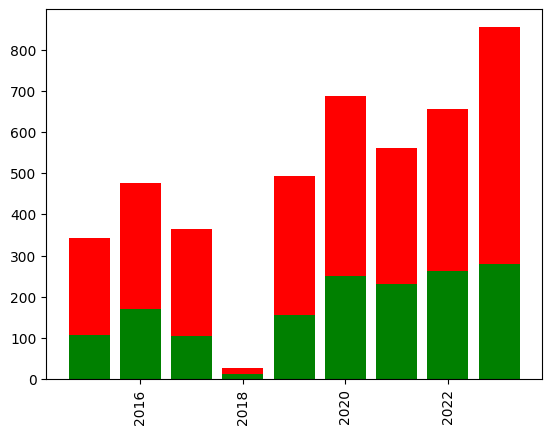

In [24]:
import matplotlib.pyplot as plt

x = sorted(hermesyearsData)

y1 = hermes_correct
y2 = hermes_incorrect

plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.xticks(rotation=90)
plt.show()

CATEGORIES


In [25]:
hermes_present = {cat:[] for cat in allCategories}

for i in range(len(hermesTotal['Categories'])):
    hermesTotal['Categories'][i] = ast.literal_eval(hermesTotal['Categories'][i])
    for cat in present:
        if cat in hermesTotal['Categories'][i]:
            hermes_present[cat].append(True)
        else:
            hermes_present[cat].append(False)

for cat in hermes_present:
    hermesTotal[cat] = hermes_present[cat]
hermesTotal


C:\Users\vetur\AppData\Local\Temp\ipykernel_16308\1117457870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hermesTotal['Categories'][i] = ast.literal_eval(hermesTotal['Categories'][i])


,QuestionText,Answer,Year,Categories,Predictions,Technology,Political,Sports,Health and Epidemiology,Stock Market,Supply Chain
0,Will advanced LIGO announce discovery of gravi...,no,2016,"[Technology, Stock Market]",YES,True,False,False,False,True,False
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],YES,False,False,False,False,False,False
2,Will we confirm evidence for megastructures or...,no,2016,"[Technology, Political, Sports, Health and Epi...",YES.,True,True,True,True,True,True
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],YES,False,False,False,False,False,False
4,The FAA to soon open the door to commercial us...,no,2016,"[Technology, Stock Market]",YES.,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,[Health and Epidemiology],YES.,False,False,False,True,False,False
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"[Health and Epidemiology, Stock Market]",YES.,False,False,False,True,True,False
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"[Health and Epidemiology, Stock Market]",YES.,False,False,False,True,True,False
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"[Health and Epidemiology, Stock Market]",YES.,False,False,False,True,True,False


In [26]:
hermescategoriesData = {}
for category in allCategories:
    categoryData = hermesTotal[hermesTotal[category]]
    categoryData = categoryData.reset_index()
    hermescategoriesData[category] = makeCM(categoryData)

hermes_correct_cat = []
hermes_incorrect_cat = []
for category in sorted(hermescategoriesData):
    cm = confusion_matrix(hermescategoriesData[category][1], hermescategoriesData[category][0])
    hermes_correct_cat.append((cm[0][0]+cm[1][1])/np.sum(cm))
    hermes_incorrect_cat.append(1-hermes_correct_cat[-1])


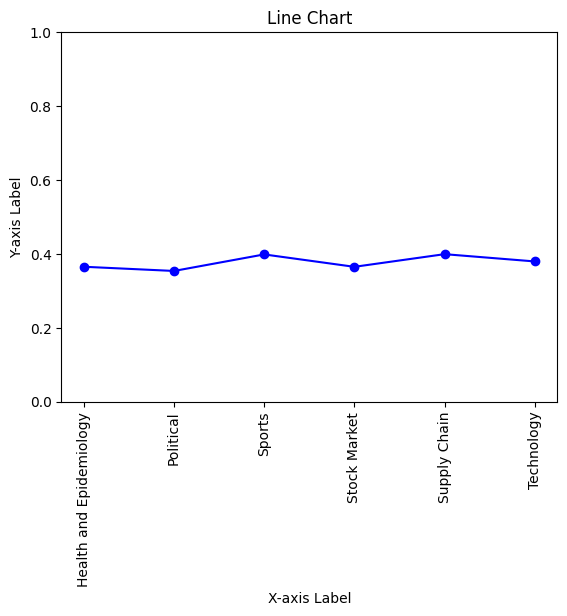

In [27]:
import matplotlib.pyplot as plt

x = sorted(hermescategoriesData)
y1 = hermes_correct_cat

plt.plot(x, y1, color='b', marker='o')  # 'o' adds markers to data points
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel('X-axis Label')  # Add a label for the X-axis
plt.ylabel('Y-axis Label')  # Add a label for the Y-axis
plt.title('Line Chart')  # Add a title for the chart
plt.show()

### Falcon

In [28]:
falconData = pd.read_csv('data/Binary/Falcon-0-4462.csv')
falconPredictions = falconData['predictions']
falconTotal = questions.copy(deep=True)
falconTotal['Predictions'] = falconPredictions
falconTotal

,QuestionText,Answer,Year,Categories,Predictions
0,Will advanced LIGO announce discovery of gravi...,no,2016,"['Technology', 'Stock Market']","Yes, advanced LIGO announced the discovery of ..."
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],Yes
2,Will we confirm evidence for megastructures or...,no,2016,"['Technology', 'Political', 'Sports', 'Health ...","Yes, we will confirm evidence for megastructur..."
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],"Yes, Lockheed Martin and Skunkworks announced ..."
4,The FAA to soon open the door to commercial us...,no,2016,"['Technology', 'Stock Market']","Yes, the FAA has announced plans to allow comm..."
...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,['Health and Epidemiology'],Yes
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"['Health and Epidemiology', 'Stock Market']","Yes, the PITF Worldwide Atrocities Dataset wil..."
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"['Health and Epidemiology', 'Stock Market']","Yes, ACLED will record any civilian fatalities..."
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"['Health and Epidemiology', 'Stock Market']","Yes, ACLED will record any civilian fatalities..."


In [29]:
yPredfalconTotal, yTruefalconTotal, noneCountfalconTotal = makeCM(falconTotal)
print(f'Total None predictions: {noneCountfalconTotal}')
confusion_matrix(yTruefalconTotal, yPredfalconTotal)

Total None predictions: 1


array([[ 385, 2556],
       [ 177, 1344]], dtype=int64)

YEARS


In [30]:
falconyearsData = {}
for year in allYears:
    yearData = falconTotal[falconTotal['Year']==year]
    yearData = yearData.reset_index()
    falconyearsData[year] = makeCM(yearData)

falcon_correct = []
falcon_incorrect = []
for year in falconyearsData:
    cm = confusion_matrix(falconyearsData[year][1], falconyearsData[year][0])
    falcon_correct.append((cm[0][0]+cm[1][1]))
    falcon_incorrect.append(np.sum(cm)-falcon_correct[-1])

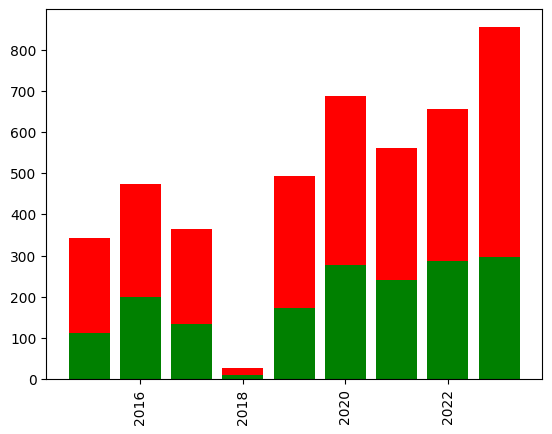

In [31]:
import matplotlib.pyplot as plt

x = sorted(falconyearsData)

y1 = falcon_correct
y2 = falcon_incorrect

plt.bar(x, y1, color='g')
plt.bar(x, y2, bottom=y1, color='r')
plt.xticks(rotation=90)
plt.show()

CATEGORIES


In [32]:
falcon_present = {cat:[] for cat in allCategories}


for i in range(len(falconTotal['Categories'])):
   falconTotal['Categories'][i] = ast.literal_eval(falconTotal['Categories'][i])
   for cat in falcon_present:
       if cat in falconTotal['Categories'][i]:
           falcon_present[cat].append(True)
       else:
           falcon_present[cat].append(False)


for cat in falcon_present:
   falconTotal[cat] = falcon_present[cat]
falconTotal

C:\Users\vetur\AppData\Local\Temp\ipykernel_16308\4279877759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falconTotal['Categories'][i] = ast.literal_eval(falconTotal['Categories'][i])


,QuestionText,Answer,Year,Categories,Predictions,Technology,Political,Sports,Health and Epidemiology,Stock Market,Supply Chain
0,Will advanced LIGO announce discovery of gravi...,no,2016,"[Technology, Stock Market]","Yes, advanced LIGO announced the discovery of ...",True,False,False,False,True,False
1,Will SpaceX successfully land a Falcon 9 rocke...,no,2016,[],Yes,False,False,False,False,False,False
2,Will we confirm evidence for megastructures or...,no,2016,"[Technology, Political, Sports, Health and Epi...","Yes, we will confirm evidence for megastructur...",True,True,True,True,True,True
3,Will Lockheed Martin and Skunkworks announce a...,no,2019,[],"Yes, Lockheed Martin and Skunkworks announced ...",False,False,False,False,False,False
4,The FAA to soon open the door to commercial us...,no,2016,"[Technology, Stock Market]","Yes, the FAA has announced plans to allow comm...",True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4458,"Between 3 October 2019 and 29 November 2019, w...",no,2019,[Health and Epidemiology],Yes,False,False,False,True,False,False
4459,Will the PITF Worldwide Atrocities Dataset rec...,yes,2019,"[Health and Epidemiology, Stock Market]","Yes, the PITF Worldwide Atrocities Dataset wil...",False,False,False,True,True,False
4460,Will ACLED record any civilian fatalities in R...,yes,2019,"[Health and Epidemiology, Stock Market]","Yes, ACLED will record any civilian fatalities...",False,False,False,True,True,False
4461,Will ACLED record any civilian fatalities in S...,yes,2019,"[Health and Epidemiology, Stock Market]","Yes, ACLED will record any civilian fatalities...",False,False,False,True,True,False


In [33]:
falconcategoriesData = {}
for category in allCategories:
   categoryData = falconTotal[falconTotal[category]]
   categoryData = categoryData.reset_index()
   falconcategoriesData[category] = makeCM(categoryData)


falcon_correct_cat = []
falcon_incorrect_cat = []
for category in sorted(falconcategoriesData):
   cm = confusion_matrix(falconcategoriesData[category][1], falconcategoriesData[category][0])
   falcon_correct_cat.append((cm[0][0]+cm[1][1])/np.sum(cm))
   falcon_incorrect_cat.append(1-falcon_correct_cat[-1])


Text(0, 0.5, 'Y-axis Label')

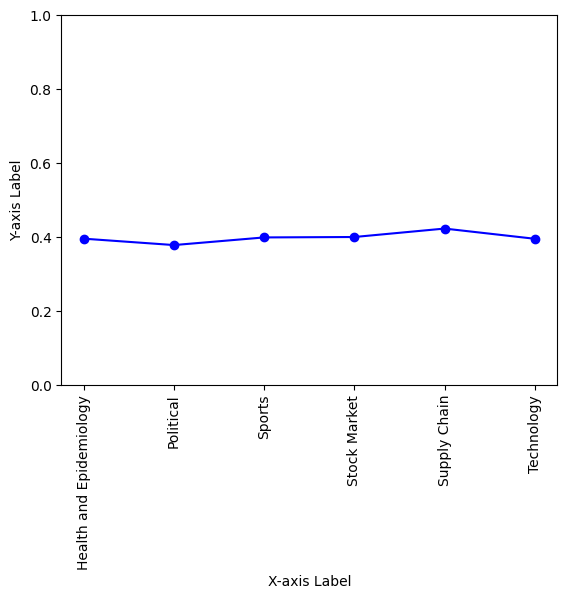

In [34]:

import matplotlib.pyplot as plt


x = sorted(falconcategoriesData)
y1 = falcon_correct_cat


plt.plot(x, y1, color='b', marker='o')  # 'o' adds markers to data points
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel('X-axis Label')  # Add a label for the X-axis
plt.ylabel('Y-axis Label')  # Add a label for the Y-axis


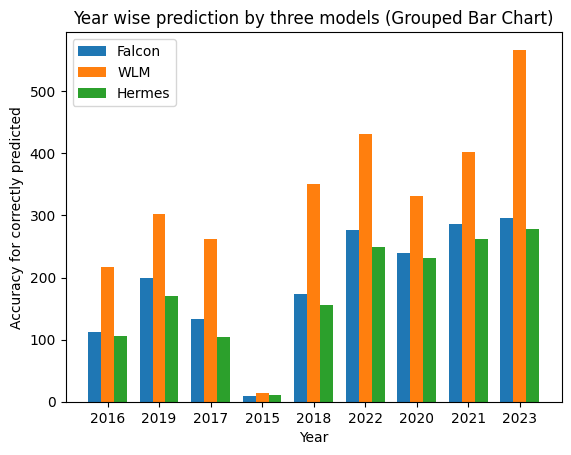

In [35]:
min_length = min(len(falcon_correct), len(correct), len(hermes_correct))

# Truncate the arrays to the minimum length
falcon_correct = np.array(falcon_correct[:min_length])
correct = np.array(correct[:min_length])
hermes_correct = np.array(hermes_correct[:min_length])

# Plotting the bar graph
bar_width = 0.25
index = np.arange(min_length)

plt.bar(index, falcon_correct, width=bar_width, label='Falcon')
plt.bar(index + bar_width, correct, width=bar_width, label='WLM')
plt.bar(index + 2 * bar_width, hermes_correct, width=bar_width, label='Hermes')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Accuracy for correctly predicted')
plt.title('Year wise prediction by three models (Grouped Bar Chart)')
plt.xticks(index + bar_width, allYears[:min_length])

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# correct_cat
# falcon_correct_cat
# hermes_correct_cat
allCategories

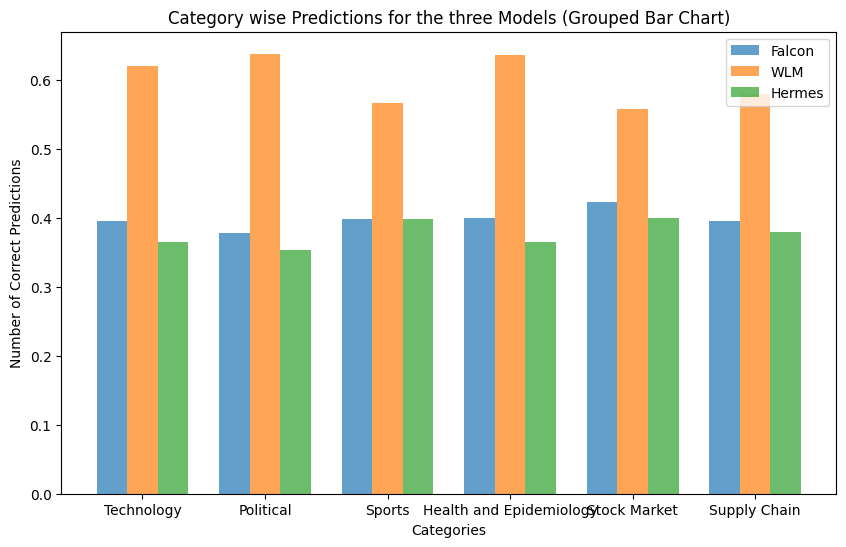

In [36]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(allCategories))


bar_width = 0.25


plt.figure(figsize=(10, 6))
ax = plt.subplot()


ax.bar(indices - bar_width, falcon_correct_cat, width=bar_width, label='Falcon', alpha=0.7)
ax.bar(indices, correct_cat, width=bar_width, label='WLM', alpha=0.7)
ax.bar(indices + bar_width, hermes_correct_cat, width=bar_width, label='Hermes', alpha=0.7)


ax.set_xlabel('Categories')
ax.set_ylabel('Number of Correct Predictions')
ax.set_title('Category wise Predictions for the three Models (Grouped Bar Chart)')

ax.legend()
ax.set_xticks(indices)
ax.set_xticklabels(allCategories)
plt.show()


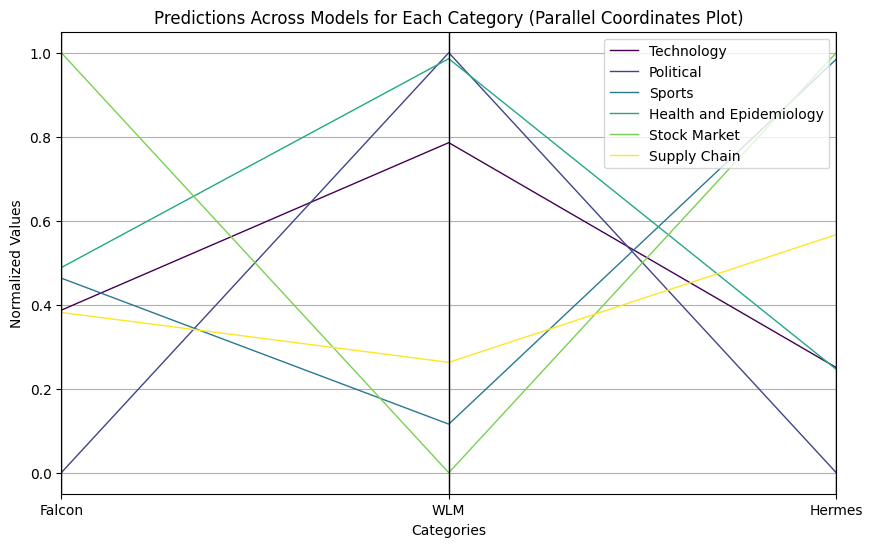

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.DataFrame({
    'Categories': allCategories,
    'Falcon': falcon_correct_cat,
    'WLM': correct_cat,
    'Hermes': hermes_correct_cat
})

normalized_data = (data.set_index('Categories') - data.set_index('Categories').min()) / (data.set_index('Categories').max() - data.set_index('Categories').min())


plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(normalized_data.reset_index(), 'Categories', colormap='viridis', linewidth=1)


plt.xlabel('Categories')
plt.ylabel('Normalized Values')
plt.title('Predictions Across Models for Each Category (Parallel Coordinates Plot)')

plt.show()
